Import the necessary libraries  


In [105]:
import openeo

Create an OpenEO session and authenticate

In [107]:
session = openeo.connect("openeo-dev.vito.be")
session.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo-dev.vito.be/openeo/1.0/' with BearerAuth>

Create a datacube with 3 bands (Blue, Red, Near Infrared) for April 5 2021

In [108]:
sentinel2_data_cube = session.load_collection(
    "TERRASCOPE_S2_TOC_V2",
    temporal_extent=["2021-04-05", "2021-04-05"],
    bands=["B02", "B04", "B08"]
)

Filter the area of interest

Download the image

In [109]:
sentinel2_data_cube = sentinel2_data_cube.filter_bbox(
    west=-25.82228669683642,
    south=37.79555483451672,
    east=-25.70044923984886,
    north=37.88502062345468,
    
    crs="EPSG:4326"
)

In [110]:
sentinel2_data_cube.download("raw.tiff")

Display the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


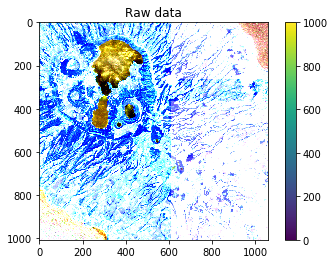

In [111]:
import rasterio
import numpy as np
from matplotlib import pyplot as plt

with rasterio.open('raw.tiff', 'r') as ds:
    img = ds.read()  

plt.title("Raw data")
plt.imshow(np.dstack(img), vmin=0, vmax=1000)  
plt.colorbar()
plt.show()

Calculate the Enhanced Vegetation Index and download the image

In [112]:
B02 = sentinel2_data_cube.band('B02')
B04 = sentinel2_data_cube.band('B04')
B08 = sentinel2_data_cube.band('B08')

evi_cube = (2.5 * (B08 - B04)) / ((B08 + 6.0 * B04 - 7.5 * B02) + 1.0)
evi_cube.download("bandmath_example.tiff", format="GTIFF")


Display the EVI

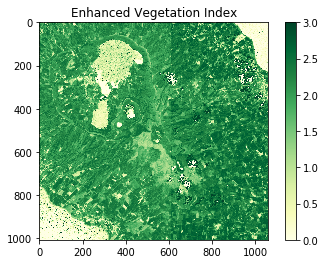

In [113]:
import rasterio
from matplotlib import pyplot as plt

with rasterio.open('bandmath_example.tiff', 'r') as ds:
    img = ds.read()  

plt.title("Enhanced Vegetation Index")
plt.imshow(img[0], vmin=0, vmax=3, cmap='YlGn')  
plt.colorbar()
plt.show()